<a href="https://colab.research.google.com/github/mohamed-chamrouk/Dev_Info/blob/master/Binary_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np

!pip install category_encoders
import category_encoders as ce

import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix

!wget "https://drive.google.com/uc?export=download&id=1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--2021-06-08 14:17:40--  https://drive.google.com/uc?export=download&id=1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O
Resolving drive.google.com (drive.google.com)... 142.251.33.206, 2607:f8b0:4004:837::200e
Connecting to drive.google.com (drive.google.com)|142.251.33.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/854cot2uu5d9us4jbrjdv5sgbjtadrl4/1623161850000/15183519386814260962/*/1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O?e=download [following]
--2021-06-08 14:17:43--  https://doc-0g-34-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/854cot2uu5d9us4jbrjdv5sgbjtadrl4/1623161850000/15183519386814260962/*/1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O?e=download
Resolving doc-0g-34-docs.googleusercontent.com (doc-0g-34-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-0g-34-docs.googleusercontent.com (doc-0g-34-docs.go

In [3]:
!mv "uc?export=download&id=1BzvT-jeNOSCItKTV95eGsUcKEtm9fn0O" dataset.csv
df = pd.read_csv('dataset.csv')
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [4]:
df = df.rename(columns={'type':'label'})
print(df['label'].unique())
df['label'].value_counts()

['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

removing columns with no significant values


In [5]:
cols_to_remove = list(["duration"])
df = df.drop(cols_to_remove, axis=1)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                494020 non-null  object 
 1   service                      494020 non-null  object 
 2   flag                         494020 non-null  object 
 3   src_bytes                    494020 non-null  int64  
 4   dst_bytes                    494020 non-null  int64  
 5   land                         494020 non-null  int64  
 6   wrong_fragment               494020 non-null  int64  
 7   urgent                       494020 non-null  int64  
 8   hot                          494020 non-null  int64  
 9   num_failed_logins            494020 non-null  int64  
 10  logged_in                    494020 non-null  int64  
 11  num_compromised              494020 non-null  int64  
 12  root_shell                   494020 non-null  int64  
 13 

transforming columns with string values to integer values 

In [6]:
encoder = ce.OneHotEncoder(cols=['protocol_type', 'service', 'flag'], use_cat_names=True)
df_encoded = encoder.fit_transform(df)
df_encoded.info(verbose=True)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 118 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   protocol_type_tcp            int64  
 1   protocol_type_udp            int64  
 2   protocol_type_icmp           int64  
 3   service_http                 int64  
 4   service_smtp                 int64  
 5   service_finger               int64  
 6   service_domain_u             int64  
 7   service_auth                 int64  
 8   service_telnet               int64  
 9   service_ftp                  int64  
 10  service_eco_i                int64  
 11  service_ntp_u                int64  
 12  service_ecr_i                int64  
 13  service_other                int64  
 14  service_private              int64  
 15  service_pop_3                int64  
 16  service_ftp_data             int64  
 17  service_rje                  int64  
 18  service_time                 int64  
 19  s

In [55]:
print((df_encoded.drop(['protocol_type_tcp', 'protocol_type_udp', 'protocol_type_icmp'], axis=1)).columns)

Index(['service_http', 'service_smtp', 'service_finger', 'service_domain_u',
       'service_auth', 'service_telnet', 'service_ftp', 'service_eco_i',
       'service_ntp_u', 'service_ecr_i',
       ...
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object', length=115)


dividing the dataframe into train and test data  


In [7]:
target=df_encoded['label']!='normal.'
target=target.astype(np.int)
print(target.unique())
print(target.value_counts())
df_encoded['label'] = target
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_encoded, test_size=0.2, random_state=2)
X_train = df_train.drop("label", axis=1)
y_train = df_train["label"]
X_test = df_test.drop("label", axis=1)
y_test = df_test["label"]

[0 1]
1    396743
0     97277
Name: label, dtype: int64


correcting Class Imbalance + Normalization using StandardScaler 

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)
print(pd.value_counts(y_train_balanced))
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = scaler.fit_transform(imp.fit_transform(X_train_balanced))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    317262
0    317262
dtype: int64


##Binary classification 


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e-9)
model.fit(X_train_scaled, y_train_balanced)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9867313064248411

--2021-06-08 14:18:09--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py.2’

visualization.py.2  100%[===================>]  12.70K  --.-KB/s    in 0s      

2021-06-08 14:18:09 (117 MB/s) - ‘visualization.py.2’ saved [13008/13008]

Normalized confusion matrix
[[0.99265124 0.00734876]
 [0.01470792 0.98529208]]


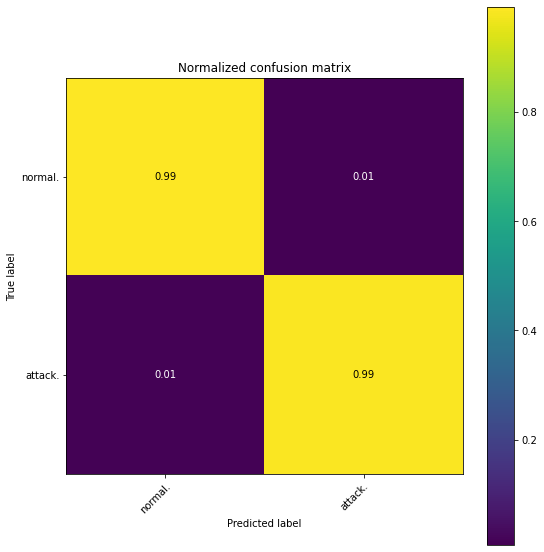

In [11]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat

class_names=np.array(["normal.", "attack."] )

plot_conf_mat(y_test, y_pred, class_names)

Multinomial regression to predict only the type of bad connections

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat


def MyMultinomialRegression(C=1e-3):
    return make_pipeline(
        LogisticRegression(multi_class="multinomial", solver="lbfgs", C=C)
    )

smote = SMOTE()
scaler = StandardScaler()

--2021-06-08 14:34:13--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py.5’

visualization.py.5  100%[===================>]  12.70K  --.-KB/s    in 0s      

2021-06-08 14:34:13 (107 MB/s) - ‘visualization.py.5’ saved [13008/13008]



In [76]:
encoder = ce.OneHotEncoder(cols=['protocol_type', 'service', 'flag'], use_cat_names=True)
df_encoded2 = encoder.fit_transform(df)

connection_classes = [0 if d == "smurf."
       else 1 if d == "neptune."
       else 2 if d == "back."
       else 3 if d == "satan."
       else 4 if d == "ipsweep."
       else 5 if d == "portsweep."
       else 6 if d == "warezclient."
       else 7
      for d in df_encoded2['label'] 
      ]
df_encoded2['connection_classes'] = connection_classes

df_encoded2.drop(df.index[df['label'] =='normal.'], inplace = True)

attack_types = []
for d in df_encoded2['label'] :
  if d in ["back.", "land.", "neptune.", "pod.", "smurf.", "teardrop."] :
    attack_types.append(0)
  elif d in ["buffer_overflow.", "loadmodule.", "perl.", "rootkit."] :
    attack_types.append(1)
  elif d in ["ftp_write.", "guess_passwd.", "imap.", "multihop.", "phf.", "spy.", "warezclient.", "warezmaster."] :
    attack_types.append(2)
  else :
    attack_types.append(3)
df_encoded2['attack_types'] = attack_types
"""classes = ['protocol_type_tcp', 'protocol_type_udp', 'protocol_type_icmp', "service_http", "service_smtp", "service_finger", 
                      "service_domain_u", "service_auth", "service_telnet", "service_ftp", "service_eco_i", "service_ntp_u", "service_ecr_i", 
                      "service_other", "service_private", "service_pop_3", "service_ftp_data", "service_rje", "service_time", "service_mtp", 
                      "service_link", "service_remote_job", "service_gopher", "service_ssh", "service_name", "service_whois", "service_domain", 
                      "service_login", "service_imap4", "service_daytime", "service_ctf", "service_nntp", "service_shell", "service_IRC", 
                      "service_nnsp", "service_http_443", "service_exec", "service_printer", "service_efs", "service_courier", "service_uucp", 
                      "service_klogin", "service_kshell", "service_echo", "service_discard", "service_systat", "service_supdup", 
                      "service_iso_tsap", "service_hostnames", "service_csnet_ns", "service_pop_2", "service_sunrpc", "service_uucp_path", 
                      "service_netbios_ns", "service_netbios_ssn", "service_netbios_dgm", "service_sql_net", "service_vmnet", "service_bgp", 
                      "service_Z39_50", "service_ldap", "service_netstat", "service_urh_i", "service_X11", "service_urp_i", "service_pm_dump", 
                      "service_tftp_u", "service_tim_i", "service_red_i",'src_bytes', 'dst_bytes', 'count', 'serror_rate', 'srv_serror_rate', 'srv_diff_host_rate']"""

"""classes = ['protocol_type_tcp', 'protocol_type_udp', 'protocol_type_icmp', "service_http", "service_smtp", "service_telnet", "service_ftp", "service_ntp_u",
                      "service_other","service_ftp_data", "service_ssh","service_whois", "service_imap4", "service_nntp", "service_IRC", "service_http_443", "service_bgp", 
                      "service_Z39_50", "service_netstat",
                      "service_tftp_u",'src_bytes', 'dst_bytes', 'count', 'serror_rate', 'srv_serror_rate', 'srv_diff_host_rate']"""

classes = ['src_bytes', 'dst_bytes', 'count']
df_train2, df_test2 = train_test_split(df_encoded2,test_size=0.2, random_state=2)
X_train2 = df_train2[classes]
X_test2 = df_test2[classes]
y_train2 = df_train2['attack_types']
y_test2 = df_test2['attack_types']
X_train_balanced2, y_train_balanced2 = smote.fit_sample(X_train2, y_train2)


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled2 = scaler.fit_transform(imp.fit_transform(X_train_balanced2))

model2 = MyMultinomialRegression(C=0.1)
model2.fit(X_train_scaled2, y_train_balanced2)

X_test_scaled2 = scaler.transform(X_test2)
y_pred2 = model2.predict(X_test_scaled2)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/p

0.7094481341919873
[0 0 0 ... 0 0 0]
110462    0
288702    0
118085    0
62741     0
220062    0
         ..
374337    0
205100    0
150008    0
46102     0
477058    0
Name: attack_types, Length: 79349, dtype: int64
Normalized confusion matrix
[[0.71753172 0.00594858 0.0020552  0.2744645 ]
 [0.         0.94117647 0.         0.05882353]
 [0.         0.90707965 0.09292035 0.        ]
 [0.34635417 0.59244792 0.         0.06119792]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


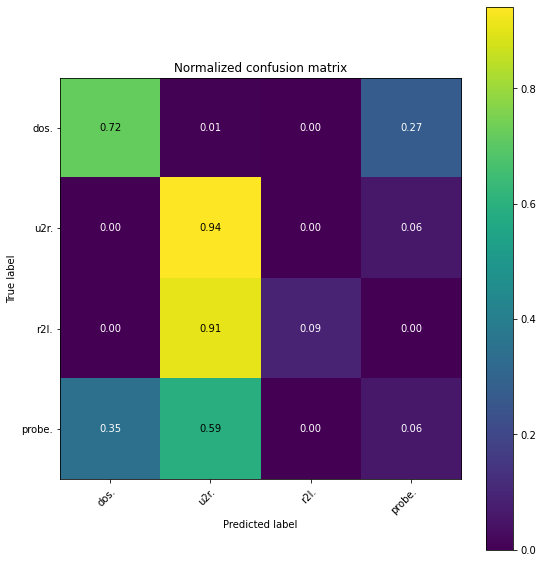

In [77]:
print(accuracy_score(y_pred2, y_test2))
print(y_pred2[[y_pred2 == 0]])
print(y_test2)
class_names=np.array(["dos.", "u2r.", "r2l.", "probe."])
#class_names=np.array([ "smurf.", "neptune.", "back." , "satan." , "ipsweep." , "portsweep." , "warezclient." , "bad."])
plot_conf_mat(y_test2, y_pred2, class_names )

In [ ]:
k=0
for i in range (0,len(y_pred)): 
  #si c'est une attaque
  if y_pred[i] == 0 :
    y_pred2 = model2.predict(X_test_scaled[i:])
    s+= accuracy_score(y_pred2, y_test2[i])
    k+=1
s=s/k
print ("accuracy score is :"+ s)